In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
np.random.seed(200929)

In [30]:
energy = pd.read_csv('../../../datasets/energydata_complete.csv')

1. ¿Cuántas observaciones tienes?

In [31]:
energy.shape

(19735, 29)

2. Transformación de variables 

In [32]:
energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


a. De la variable date, genera 3 nuevas columnas para que tengas el año, el mes y el día. 

In [33]:
energy['year'] = pd.DatetimeIndex(energy['date']).year
energy['month'] = pd.DatetimeIndex(energy['date']).month
energy['day'] = pd.DatetimeIndex(energy['date']).day

In [34]:
energy.drop("date", inplace=True, axis=1)

In [35]:
energy.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,year,month,day
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016,1,11
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016,1,11
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016,1,11
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016,1,11
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016,1,11


b. Elimina las variables rv1 y rv2 utilizando el método drop de pandas.

In [36]:
energy.drop(['rv1','rv2'], inplace=True, axis=1)

In [37]:
energy.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,year,month,day
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,2016,1,11
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,2016,1,11
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,2016,1,11
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,2016,1,11
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,2016,1,11


c. Escala las variables

In [38]:
from sklearn.preprocessing import scale

In [39]:
X = scale(energy)

In [40]:
X[:3]

array([[-0.36767572,  3.30126384, -1.11864475,  1.84382063, -0.52041138,
         1.07368343, -1.23506343,  1.68612997, -0.90821667,  1.50643758,
        -1.31490324,  0.47116038, -0.14519618,  0.95179837, -1.45364639,
         1.21986131, -1.95750878,  1.14157236, -1.21732362,  0.95813624,
        -0.15264674, -2.97632767,  0.82208042,  1.20769354,  2.09159642,
         0.3669753 ,  0.        , -1.56936931, -0.59845459],
       [-0.36767572,  3.30126384, -1.11864475,  1.61680671, -0.52041138,
         1.05709748, -1.23506343,  1.70456601, -0.90821667,  1.6045285 ,
        -1.31490324,  0.47116038, -0.17694121,  0.94559165, -1.45364639,
         1.2068254 , -1.95750878,  1.13455378, -1.20077824,  0.96536273,
        -0.17458781, -2.96281279,  0.82208042,  1.07170342,  1.76658397,
         0.34313479,  0.        , -1.56936931, -0.59845459],
       [-0.46521548,  3.30126384, -1.11864475,  1.51795932, -0.52041138,
         1.03354953, -1.23506343,  1.74860768, -0.94411453,  1.58091757,
  

3. Ocupar k-means para formar grupos

a, b, c y d.

In [41]:
import seaborn as sns

from sklearn.cluster import KMeans

In [42]:
def k_means(ngroups):
    k_means_groups = []

    for element in ngroups:
        m1 = KMeans(n_clusters=element)
        a = m1.fit(X)
        aux = {'centroides': a.cluster_centers_, 'labels': a.labels_, 'sse': a.inertia_}
        k_means_groups.append(aux)
        
    return k_means_groups

In [43]:
results = k_means([5,7,9,11])

4. Gráfica de codo

7 grupos pueden ser buenos puntos de corte.

In [44]:
sse = []
for element in results:
    sse.append(element['sse'])

In [45]:
sse

[279625.8346017843, 248091.95281497433, 231055.7263325193, 218047.87780864397]

In [46]:
sse_df = pd.DataFrame({'groups': [5,7,9,11], 'sse': sse})

<AxesSubplot:xlabel='groups', ylabel='sse'>

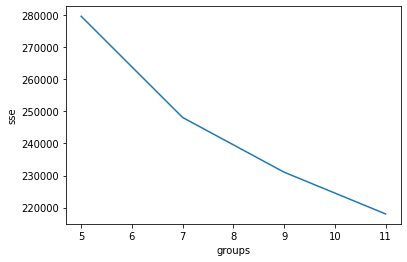

In [47]:
sns.lineplot(x="groups", y="sse", data=sse_df)

5. ¿Cuáles son las coordenadas de los centroides correspondientes a los grupos generados en la opción seleccionada en la pregunta 4?

In [48]:
centroides_kmeans_7 = results[1]['centroides']

In [49]:
centroides_kmeans_7

array([[ 0.11175414,  0.48802543, -0.06490258,  0.89588824,  0.18184211,
         0.53466499, -0.27380551,  1.31896882, -0.37813222,  1.16908572,
        -0.30575364,  0.69113189, -0.22649128,  1.08219644, -0.70574833,
         1.06983377, -0.5007236 ,  1.18321984, -0.62357939,  1.07832561,
        -0.17121151, -0.51907588,  0.55204228,  0.82035698,  0.07289113,
         0.18857708,  0.        , -0.97611697, -0.56377383],
       [-0.02139475, -0.06829776, -0.17423179, -0.90017255, -0.42771611,
        -0.58425788, -0.19366767, -0.97572351, -0.06132851, -0.9775375 ,
        -0.25584757, -0.40041203, -0.32379064, -0.44185657,  0.02286648,
        -1.02823656,  0.14886752, -0.90065734, -0.04905497, -0.85148517,
        -0.36104718,  0.66554669, -0.25100547, -0.25084181,  0.00847291,
        -0.58423459,  0.        ,  0.20648615,  0.33258732],
       [-0.24754042, -0.12824213, -1.45108857,  0.96345   , -0.78816273,
         0.81541713, -1.31592393,  1.41821177, -1.50415057,  1.39390764,
  

In [50]:
centroides_kmeans_7_aux = []

for i, element in enumerate(centroides_kmeans_7):
    aux = {}
    for j, col in enumerate(energy.columns.values):
        aux[col] = element[j]
    aux['grupo'] = str(i)
    centroides_kmeans_7_aux.append(aux)
    

In [51]:
centroides_kmeans_7_df = pd.DataFrame(centroides_kmeans_7_aux)

In [52]:
centroides_kmeans_7_df['group'] = "C"
centroides_kmeans_7_df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,year,month,day,grupo,group
0,0.111754,0.488025,-0.064903,0.895888,0.181842,0.534665,-0.273806,1.318969,-0.378132,1.169086,...,-0.519076,0.552042,0.820357,0.072891,0.188577,0.0,-0.976117,-0.563774,0,C
1,-0.021395,-0.068298,-0.174232,-0.900173,-0.427716,-0.584258,-0.193668,-0.975724,-0.061329,-0.977538,...,0.665547,-0.251005,-0.250842,0.008473,-0.584235,0.0,0.206486,0.332587,1,C
2,-0.247540,-0.128242,-1.451089,0.963450,-0.788163,0.815417,-1.315924,1.418212,-1.504151,1.393908,...,0.741022,0.551150,0.754866,-0.002330,0.336223,0.0,-1.561311,1.041596,2,C
3,-0.032364,0.132734,-0.878302,-0.523140,-0.828655,-0.361782,-0.943771,-0.266312,-0.778968,-0.540183,...,-0.156367,0.399760,-0.353292,0.153607,-1.066794,0.0,-0.705838,-0.170005,3,C
4,0.081937,-0.215585,1.787557,1.690722,1.647319,1.302739,1.973363,1.022481,1.792636,1.288652,...,-0.474307,-0.024749,-0.346908,-0.051553,1.979746,0.0,1.408534,0.162541,4,C
5,-0.037221,-0.136719,0.292309,0.203088,-0.081187,0.626461,0.530324,-0.110772,0.260038,0.100088,...,-0.367388,0.254411,-0.137631,-0.167165,0.485169,0.0,0.544624,0.065386,5,C
6,0.103832,-0.266845,1.085513,-0.606137,1.401682,-1.284648,0.918101,-0.779624,1.192458,-0.631704,...,0.202483,-1.558799,-0.023034,-0.053771,0.328105,0.0,1.166026,-0.385130,6,C


6. Etiqueta cada observación con el grupo al que pertenece

a. Cuántas observaciones hay por grupo


In [53]:
etiquetas = results[1]['labels']

In [54]:
etiquetas[:3]

array([0, 0, 0], dtype=int32)

In [55]:
scaled_data = pd.DataFrame(X, columns=energy.columns.values)

In [56]:
scaled_data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,year,month,day
0,-0.367676,3.301264,-1.118645,1.843821,-0.520411,1.073683,-1.235063,1.686130,-0.908217,1.506438,...,0.958136,-0.152647,-2.976328,0.82208,1.207694,2.091596,0.366975,0.0,-1.569369,-0.598455
1,-0.367676,3.301264,-1.118645,1.616807,-0.520411,1.057097,-1.235063,1.704566,-0.908217,1.604528,...,0.965363,-0.174588,-2.962813,0.82208,1.071703,1.766584,0.343135,0.0,-1.569369,-0.598455
2,-0.465215,3.301264,-1.118645,1.517959,-0.520411,1.033550,-1.235063,1.748608,-0.944115,1.580918,...,0.950910,-0.196529,-2.949298,0.82208,0.935713,1.441572,0.319294,0.0,-1.569369,-0.598455
3,-0.465215,4.561378,-1.118645,1.459321,-0.520411,1.024540,-1.235063,1.769092,-0.962063,1.542526,...,0.926821,-0.218470,-2.935783,0.82208,0.799723,1.116559,0.295454,0.0,-1.569369,-0.598455
4,-0.367676,4.561378,-1.118645,1.526336,-0.520411,1.009797,-1.235063,1.769092,-0.962063,1.497991,...,0.926821,-0.240411,-2.922268,0.82208,0.663733,0.791547,0.271613,0.0,-1.569369,-0.598455


In [57]:
scaled_data['group'] = etiquetas

In [58]:
scaled_data.groupby(['group'], as_index=False)['lights']\
.count()\
.rename(columns={'lights': 'count'})

,group,count
0,0,2890
1,1,3950
2,2,1390
3,3,3866
4,4,1406
5,5,3768
6,6,2465


b. ¿Cuáles son las características principales de cada grupo encontrado en la opción seleccionada en la pregunta 4? 

In [59]:
energy['group'] = etiquetas

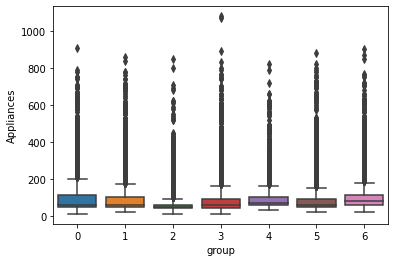

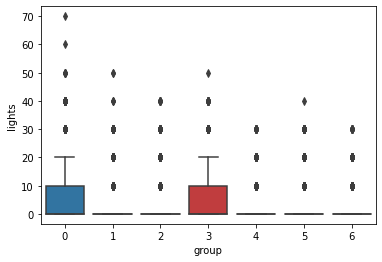

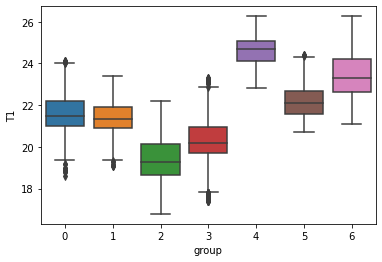

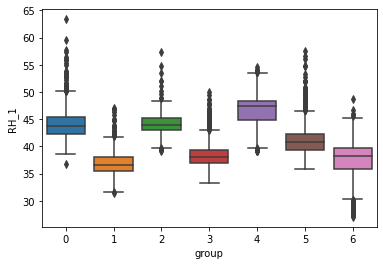

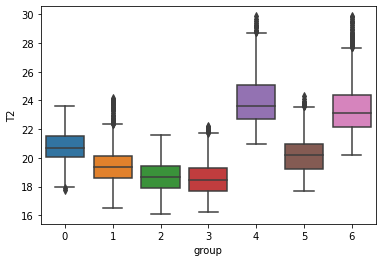

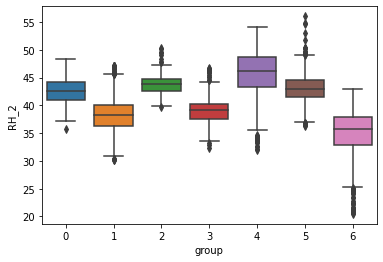

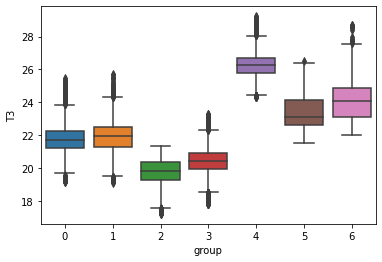

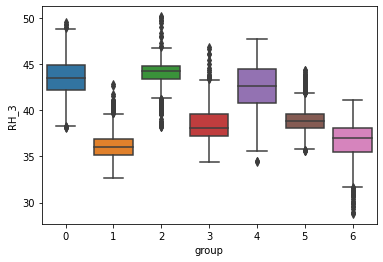

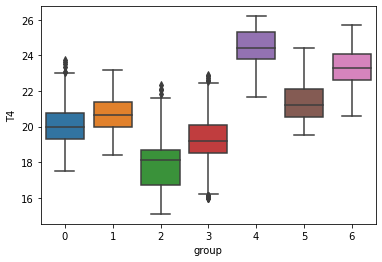

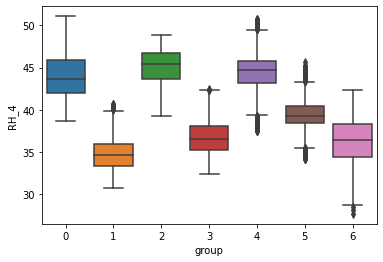

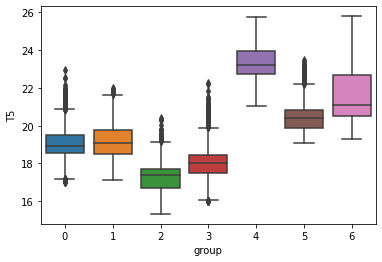

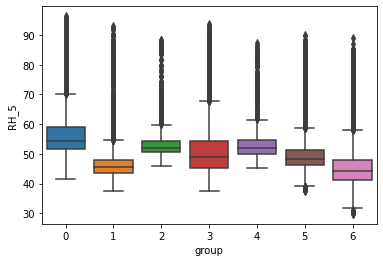

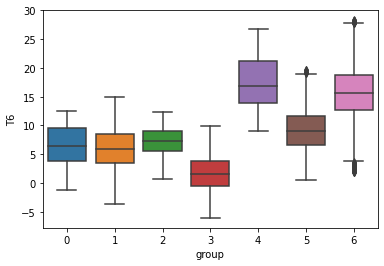

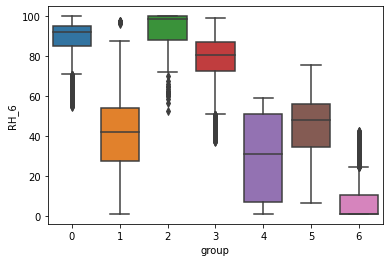

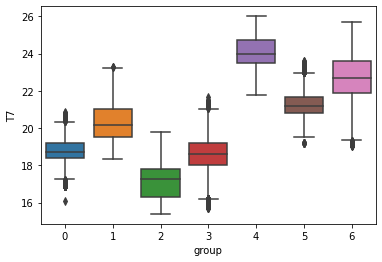

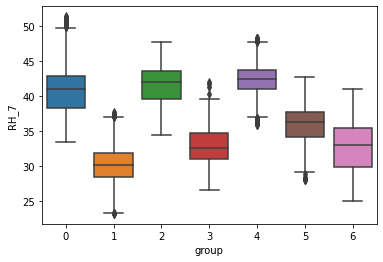

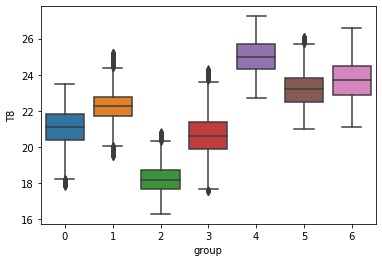

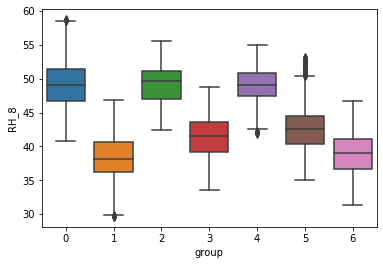

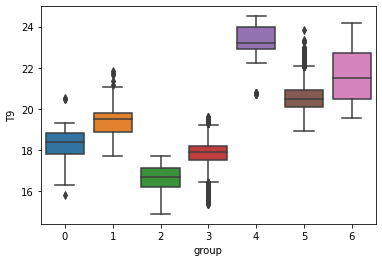

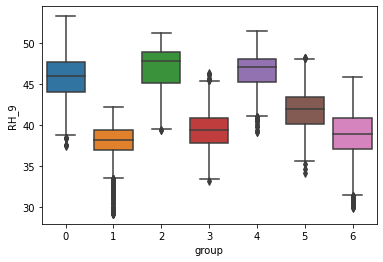

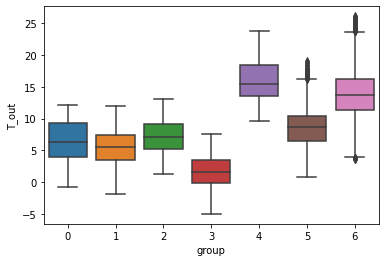

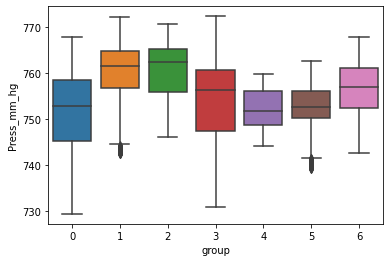

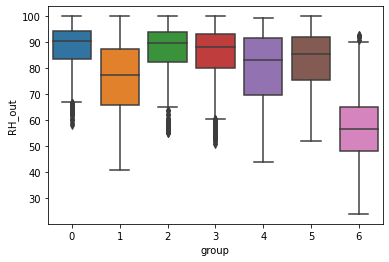

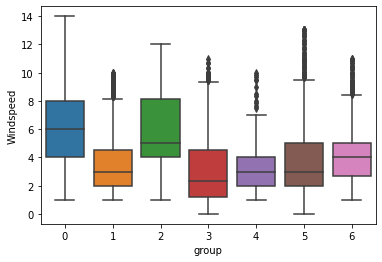

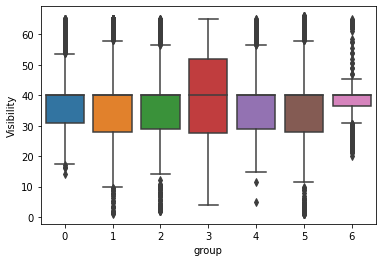

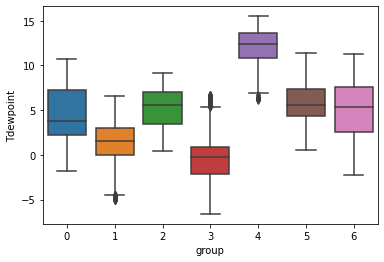

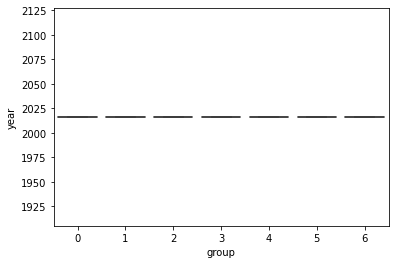

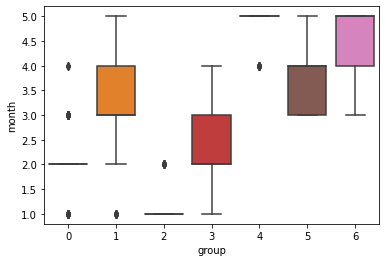

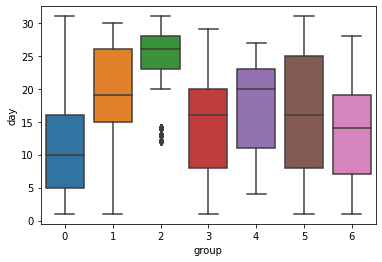

<Figure size 432x288 with 0 Axes>

In [60]:
for col in energy.columns.values:
    plt.clf()
    if col != 'group':
        a = sns.boxplot(x="group", y=col, data=energy)
        plt.show(a)

**Características**

+ Grupo 0:
    + Días del mes: Se enfoca en los días que abarcan del 5 al 16 -primera quincena del mes-.
    + Mes: Se enfoca en los primeros días de febrero.
    + Temperatura en cuarto de la cocina: Se enfoca en valores entre 21 y 22 grados.
    + Humedad del a cocina: Se enfoca en los rangos de valor entre el 42.5 y 45% de humedad.  
    + Temperatura de la sala: Se enfoca en los rangos de valor entre 21.8 y 22 grados.
    + Humedad de la sala: Se enfoca en los rangos de valor entre el 42.5 y 45% de humedad. 
    + Temperatura del cuarto de lavado: Se enfoca en los rangos de valor entre 19 y 21 grados.
    + Humedad del cuarto de lavado: Se enfoca en los rangos de valor entre el 42.5 y 45.3% de humedad.
    + Temperatura de la oficina: Se enfoca en los rangos de valor entre 18.5 y 19.5 grados.
    + Humedad de la oficina: Se enfoca en los rangos de valor entre el 51 y 60% de humedad.
    + Temperatura del baño: Se enfoca en los rangos de valor entre 4.5 y 10 grados.
    + Humedad del baño: Se enfoca en los rangos de valor entre el 80.5 y 90.5% de humedad.

+ Grupo 1:
    + Días del mes: Se enfoca en los días que abarcan del 11 al 23.
    + Mes: Se enfoca en el mes de mayo.
    + Temperatura en cuarto de la cocina: Se enfoca en valores entre 24 y 25 grados.
    + Humedad del a cocina: Se enfoca en los rangos de valor entre el 45 y 47% de humedad.  
    + Temperatura de la sala: Se enfoca en los rangos de valor entre 25.8 y 27 grados.
    + Humedad de la sala: Se enfoca en los rangos de valor entre el 41.5 y 44.8% de humedad. 
    + Temperatura del cuarto de lavado: Se enfoca en los rangos de valor entre 24 y 25.5 grados.
    + Humedad del cuarto de lavado: Se enfoca en los rangos de valor entre el 44.5 y 45.2% de humedad.
    + Temperatura de la oficina: Se enfoca en los rangos de valor entre 23 y 24 grados.
    + Humedad de la oficina: Se enfoca en los rangos de valor entre el 50 y 55% de humedad.
    + Temperatura del baño: Se enfoca en los rangos de valor entre 14.8 y 21.5 grados.
    + Humedad del baño: Se enfoca en los rangos de valor entre el 10 y 55% de humedad.

+ Grupo 2:
    + Días del mes: Se enfoca en los días que abarcan del 16 al 26 -segunda quincena-.
    + Mes: Se enfoca en los primeros días del mes de marzo.
    + Temperatura en cuarto de la cocina: Se enfoca en valores entre 21 y 22 grados.
    + Humedad del a cocina: Se enfoca en los rangos de valor entre el 35.5 y 38% de humedad.  
    + Temperatura de la sala: Se enfoca en los rangos de valor entre 21.8 y 22.4 grados.
    + Humedad de la sala: Se enfoca en los rangos de valor entre el 35.3 y 37 de humedad. 
    + Temperatura del cuarto de lavado: Se enfoca en los rangos de valor entre 20.5 y 21.5 grados.
    + Humedad del cuarto de lavado: Se enfoca en los rangos de valor entre el 34.5 y 35.5% de humedad.
    + Temperatura de la oficina: Se enfoca en los rangos de valor entre 18.3 y 20 grados.
    + Humedad de la oficina: Se enfoca en los rangos de valor entre el 45 y 49% de humedad.
    + Temperatura del baño: Se enfoca en los rangos de valor entre 4.5 y 8.5 grados.
    + Humedad del baño: Se enfoca en los rangos de valor entre el 32 y 57% de humedad.

+ Grupo 3:
    + Días del mes: Se enfoca en los días que abarcan del 24 al 28 -fin de mes-.
    + Mes: Se enfoca en el mes de enero.
    + Temperatura en cuarto de la cocina: Se enfoca en valores entre 19 y 20 grados.
    + Humedad del a cocina: Se enfoca en los rangos de valor entre el 44 y 45% de humedad.  
    + Temperatura de la sala: Se enfoca en los rangos de valor entre 19 y 20.5 grados.
    + Humedad de la sala: Se enfoca en los rangos de valor entre el 44 y 45% de humedad. 
    + Temperatura del cuarto de lavado: Se enfoca en los rangos de valor entre 17 y 18.3 grados.
    + Humedad del cuarto de lavado: Se enfoca en los rangos de valor entre el 44 y 45.5% de humedad.
    + Temperatura de la oficina: Se enfoca en los rangos de valor entre 17 y 19 grados.
    + Humedad de la oficina: Se enfoca en los rangos de valor entre el 53 y 56% de humedad.
    + Temperatura del baño: Se enfoca en los rangos de valor entre 6.5 y 9.5 grados.
    + Humedad del baño: Se enfoca en los rangos de valor entre el 90 y 100% de humedad.
    
+ Grupo 4: 
    + Días del mes: Se enfoca en los días que abarcan del 9 al 18.
    + Mes: Se enfoca en el mes de abril.
    + Temperatura en cuarto de la cocina: Se enfoca en valores entre 22.5 y 24 grados.
    + Humedad del a cocina: Se enfoca en los rangos de valor entre el 37 y 40% de humedad.  
    + Temperatura de la sala: Se enfoca en los rangos de valor entre 23.5 y 24.3 grados.
    + Humedad de la sala: Se enfoca en los rangos de valor entre el 35.5 y 37% de humedad. 
    + Temperatura del cuarto de lavado: Se enfoca en los rangos de valor entre 23 y 24 grados.
    + Humedad del cuarto de lavado: Se enfoca en los rangos de valor entre el 34.7 y 47% de humedad.
    + Temperatura de la oficina: Se enfoca en los rangos de valor entre 20.5 y 22.5 grados.
    + Humedad de la oficina: Se enfoca en los rangos de valor entre el 43 y 48% de humedad.
    + Temperatura del baño: Se enfoca en los rangos de valor entre 14 y 19 grados.
    + Humedad del baño: Se enfoca en los rangos de valor entre el 2 y 8% de humedad.

+ Grupo 5:
    + Días del mes: Se enfoca en los días que abarcan del 8 al 19.
    + Mes: Se enfoca en el mes de febrero.
    + Temperatura en cuarto de la cocina: Se enfoca en valores entre 19 y 21 grados.
    + Humedad del a cocina: Se enfoca en los rangos de valor entre el 37 y 38% de humedad.  
    + Temperatura de la sala: Se enfoca en los rangos de valor entre 19.8 y 20.5 grados.
    + Humedad de la sala: Se enfoca en los rangos de valor entre el 37 y 39% de humedad. 
    + Temperatura del cuarto de lavado: Se enfoca en los rangos de valor entre 18.5 y 20 grados.
    + Humedad del cuarto de lavado: Se enfoca en los rangos de valor entre el 35.5 y 38.5% de humedad.
    + Temperatura de la oficina: Se enfoca en los rangos de valor entre 17 y 18.3 grados.
    + Humedad de la oficina: Se enfoca en los rangos de valor entre el 48 y 53% de humedad.
    + Temperatura del baño: Se enfoca en los rangos de valor entre 1 y 4 grados.
    + Humedad del baño: Se enfoca en los rangos de valor entre el 75 y 87% de humedad.

+ Grupo 6:
    + Días del mes: Se enfoca en los días que abarcan del 8 al 24.
    + Mes: Se enfoca en el mes de marzo.
    + Temperatura en cuarto de la cocina: Se enfoca en valores entre 21 y 22 grados.
    + Humedad del a cocina: Se enfoca en los rangos de valor entre el 43 y 45% de humedad.  
    + Temperatura de la sala: Se enfoca en los rangos de valor entre 22.5 y 23.8 grados.
    + Humedad de la sala: Se enfoca en los rangos de valor entre el 38 y 39% de humedad. 
    + Temperatura del cuarto de lavado: Se enfoca en los rangos de valor entre 21 y 22 grados.
    + Humedad del cuarto de lavado: Se enfoca en los rangos de valor entre el 39 y 40% de humedad.
    + Temperatura de la oficina: Se enfoca en los rangos de valor entre 20 y 20.8 grados.
    + Humedad de la oficina: Se enfoca en los rangos de valor entre el 49 y 52% de humedad.
    + Temperatura del baño: Se enfoca en los rangos de valor entre 8 y 11.5 grados.
    + Humedad del baño: Se enfoca en los rangos de valor entre el 38 y 57% de humedad.

7. Genera un scatterplot utilizando únicamente las variables T1 y T2 ocupando un color diferente para cada grupo

In [76]:
energy['group'] = energy.group.astype('category')

In [77]:
energy.group.unique()

[0, 2, 3, 1, 5, 6, 4]
Categories (7, object): [0, 2, 3, 1, 5, 6, 4]

<AxesSubplot:xlabel='T1', ylabel='T2'>

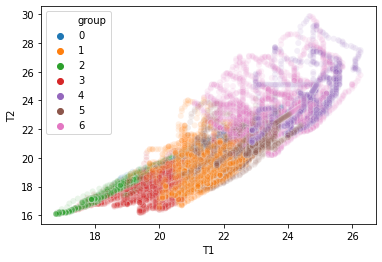

In [81]:
sns.scatterplot(x="T1", y="T2", data=energy, hue="group", alpha=0.1)